# mingrad binary classification on breast cancer dataset

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from mingrad.engine import Value
from mingrad.nn import Linear, Sequential, MSE, SGD, Sigmoid
import matplotlib.pyplot as plt

### data

In [3]:
data = load_breast_cancer()
x, y = data.data, data.target
y = y.reshape(-1, 1)

# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Value
n_features = x_train.shape[1]
x_train, y_train, x_test = Value(x_train), Value(y_train), Value(x_test)

### logistic regression model

In [4]:
model = Sequential(
    Linear(n_features, 1),
    Sigmoid()
)

### optimizer and loss function

In [5]:
optimizer = SGD(model.parameters(), lr=0.9)
loss_func = MSE()

### training loop

In [6]:
losses = []
for epoch in range(100):
    out = model(x_train)
    loss = loss_func(out, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.data}")
    losses.append(loss.data)

Epoch 1, Loss: 0.16119821359605166
Epoch 2, Loss: 0.15782162414469672
Epoch 3, Loss: 0.1550773913470013
Epoch 4, Loss: 0.15285094025511786
Epoch 5, Loss: 0.15104624576533468
Epoch 6, Loss: 0.14958388339555975
Epoch 7, Loss: 0.1483987695225135
Epoch 8, Loss: 0.14743791615615748
Epoch 9, Loss: 0.14665837017795633
Epoch 10, Loss: 0.14602540914402443
Epoch 11, Loss: 0.14551100883255808
Epoch 12, Loss: 0.14509256760262268
Epoch 13, Loss: 0.144751858942455
Epoch 14, Loss: 0.14447417932573578
Epoch 15, Loss: 0.14424765924511107
Epoch 16, Loss: 0.1440627084069971
Epoch 17, Loss: 0.14391157004716237
Epoch 18, Loss: 0.14378796336222777
Epoch 19, Loss: 0.14368679676146487
Epoch 20, Loss: 0.14360393787273543
Epoch 21, Loss: 0.1435360289571313
Epoch 22, Loss: 0.14348033863097778
Epoch 23, Loss: 0.1434346426190602
Epoch 24, Loss: 0.1433971277335708
Epoch 25, Loss: 0.14336631445089695
Epoch 26, Loss: 0.14334099439761847
Epoch 27, Loss: 0.14332017980442716
Epoch 28, Loss: 0.14330306258062267
Epoch 29,

### loss curve

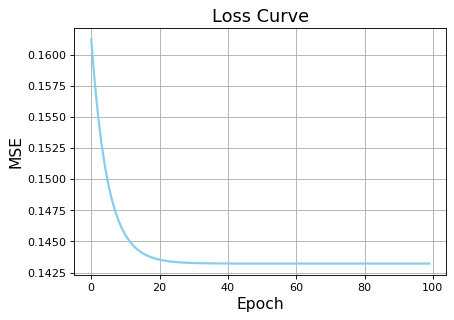

In [7]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)

ax.plot(losses, color='skyblue', linewidth=2)
ax.set_title('Loss Curve', fontsize=16)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.grid(True)

plt.show()

### predict

In [8]:
y_pred = model(x_test)
y_pred_binary = (y_pred.data > 0.5).astype(float)

### confusion matrix

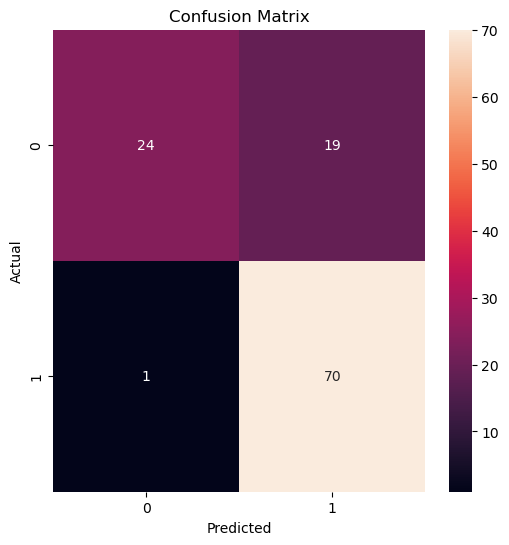

In [9]:
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()